<a href="https://colab.research.google.com/github/glenmiracle18/Glen-s-repo/blob/main/wake_up_call_in_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [64]:
all_data = pd.read_csv('/content/all_data.csv')
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


##Q1: What month had the highest sales?

In [65]:
all_data = all_data.drop('Unnamed: 0', axis=1)

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [66]:
all_data.index = all_data['Order ID']

In [9]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,,
295665,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
295666,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
295667,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
295668,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
295669,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [67]:
all_data.drop('Order ID', axis=1, inplace=True)

In [11]:
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [12]:
all_data.dtypes

Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [68]:
# lets get mask of all bolean null data cells in the column
mask = all_data['Price Each'].isnull()

In [69]:
nan_values = all_data.loc[mask, 'Price Each']
nan_values

Order ID
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
      ... 
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
Name: Price Each, Length: 545, dtype: object

In [70]:
all_data = all_data.dropna()

In [71]:
all_data.isna()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
295665,False,False,False,False,False
295666,False,False,False,False,False
295667,False,False,False,False,False
295668,False,False,False,False,False
295669,False,False,False,False,False
...,...,...,...,...,...
176554,False,False,False,False,False
176555,False,False,False,False,False
176556,False,False,False,False,False


In [24]:
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [35]:
!pip install datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 26.6 MB/s eta 0:00:00


In [73]:
def convert_to_datetime(val):
    try:
        return pd.to_datetime(val, format='%m/%d/%y %H:%M')
    except ValueError:
        return val

# apply the conversion function to the "Order Date" column
all_data['Order Date'] = all_data['Order Date'].apply(convert_to_datetime)
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [74]:
# get the index of the rows to drop
index_to_drop = all_data.loc[all_data['Order Date'] == 'Order Date'].index

# drop the rows with the ignored datetime format
all_data = all_data.drop(index=index_to_drop)

In [75]:
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [76]:
all_data.dtypes

Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [77]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M:%S')

In [78]:
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [79]:
all_data.dtypes

Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [80]:
all_data['Price Each'] = all_data['Price Each'].astype('float')

In [81]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')

In [82]:
all_data.dtypes

Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [83]:
all_data['Month'] = all_data['Order Date'].dt.month

In [84]:
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
Order ID,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12


In [85]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [86]:
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Order ID,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


In [98]:
monthly_sales = all_data.groupby(all_data['Month']).sum('Sales')

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


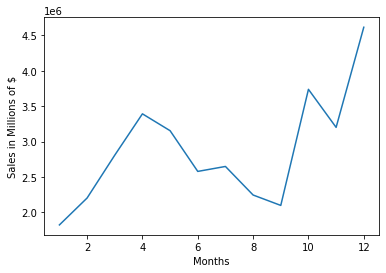

In [95]:
month = range(1, 13)
plt.plot(month, monthly_sales['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales in Millions of $')
plt.show()

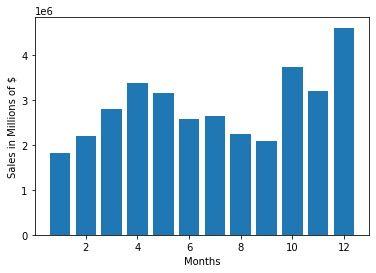

In [96]:
month = range(1, 13)
plt.bar(month, monthly_sales['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales in Millions of $')
plt.show()

Therefore, the month with the higest sale was in December. with sales going up to $4613443.3.

##Q2: What ciry had the highest sales?

In [107]:
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Order ID,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


In [106]:
all_data = all_data.drop('City', axiz=1)
#this is just a misunderstanding. dont't focus on this as it will be handled below

In [113]:
#Now I have to concatenate city with its abbreviation to avoid error
city = all_data['Purchase Address'].str.split(',').str[1].str.strip()
state = all_data['Purchase Address'].str.split(',').str[2].str.strip().str[0:2] #this selects only the city abbrv and not the zip code

address = city + ' ' + state
address.head()

Order ID
295665    New York City NY
295666    New York City NY
295667    New York City NY
295668    San Francisco CA
295669          Atlanta GA
Name: Purchase Address, dtype: object

In [114]:
all_data['City'] = address

In [115]:
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Order ID,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [126]:
#now let us group by the city column
city_sales = all_data.groupby(all_data['City']).sum('Sales')

In [ ]:
plt.plot(city_sales['Sales'])
plt.xticks(rotation = 45)
plt.show()

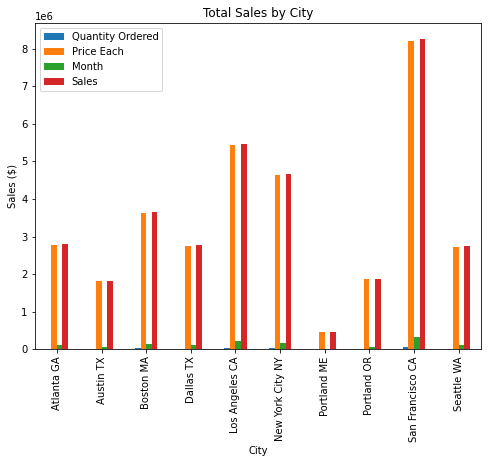

In [127]:
fig, ax = plt.subplots(figsize=(8, 6))
city_sales.plot(kind='bar', ax=ax)

ax.set_xlabel('City')
ax.set_ylabel('Sales ($)')
ax.set_title('Total Sales by City')

plt.show()